In [1]:
%matplotlib inline
import cosima_cookbook as cc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid
import numpy as np
import netCDF4 as nc
import xarray as xr
import cmocean as cm
import cartopy
import cartopy.crs as ccrs
import pandas as pd
import copy
import math
from collections import OrderedDict
# import seaborn as sns

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

netcdf_index loaded.


/home/157/amh157/.local/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
figdir = ''
def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname+'.png'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    plt.savefig(os.path.join(figdir, fname+'.pdf'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    return

In [3]:
def global_scalar(variable):
    for ekey in exptdata.exptdict.keys():
        expt = exptdata.exptdict[ekey]['expt']
        n = exptdata.exptdict[ekey]['n_files']
        time_units = exptdata.exptdict[ekey]['time_units']
        offset = exptdata.exptdict[ekey]['offset']
        darray = cc.get_nc_variable(expt,'ocean_scalar.nc',
                                    variable,n=n,
                                    time_units=time_units,offset=offset)
        annual_average = darray.resample(time='A').mean()
        annual_average.plot(label=ekey)

    plt.gca().autoscale()
    #plt.legend()

Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


Deleting cache file cache_get_nc_variable_1deg_jra55v13_iaf_spinup1_A_ocean_scalar.nc_temp_global_ave_None_days-since-1718-01-01_-87658_False.pkl
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


Deleting cache file cache_get_nc_variable_025deg_jra55v13_iaf_ocean_scalar.nc_temp_global_ave_None_days-since-1718-01-01_-87658_False.pkl
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


Deleting cache file cache_get_nc_variable_01deg_jra55v13_iaf_ocean_scalar.nc_temp_global_ave_None_None_None_False.pkl
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


Deleting cache file cache_get_nc_variable_1deg_jra55v13_iaf_spinup1_A_ocean_scalar.nc_salt_surface_ave_None_days-since-1718-01-01_-87658_False.pkl
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


Deleting cache file cache_get_nc_variable_025deg_jra55v13_iaf_ocean_scalar.nc_salt_surface_ave_None_days-since-1718-01-01_-87658_False.pkl
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


Deleting cache file cache_get_nc_variable_01deg_jra55v13_iaf_ocean_scalar.nc_salt_surface_ave_None_None_None_False.pkl
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


Deleting cache file cache_get_nc_variable_1deg_jra55v13_iaf_spinup1_A_ocean_scalar.nc_eta_global_None_days-since-1718-01-01_-87658_False.pkl
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


Deleting cache file cache_get_nc_variable_025deg_jra55v13_iaf_ocean_scalar.nc_eta_global_None_days-since-1718-01-01_-87658_False.pkl
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


Deleting cache file cache_get_nc_variable_01deg_jra55v13_iaf_ocean_scalar.nc_eta_global_None_None_None_False.pkl
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


Deleting cache file cache_get_nc_variable_1deg_jra55v13_iaf_spinup1_A_ocean_scalar.nc_ke_tot_None_days-since-1718-01-01_-87658_False.pkl
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


Deleting cache file cache_get_nc_variable_025deg_jra55v13_iaf_ocean_scalar.nc_ke_tot_None_days-since-1718-01-01_-87658_False.pkl
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


Deleting cache file cache_get_nc_variable_01deg_jra55v13_iaf_ocean_scalar.nc_ke_tot_None_None_None_False.pkl


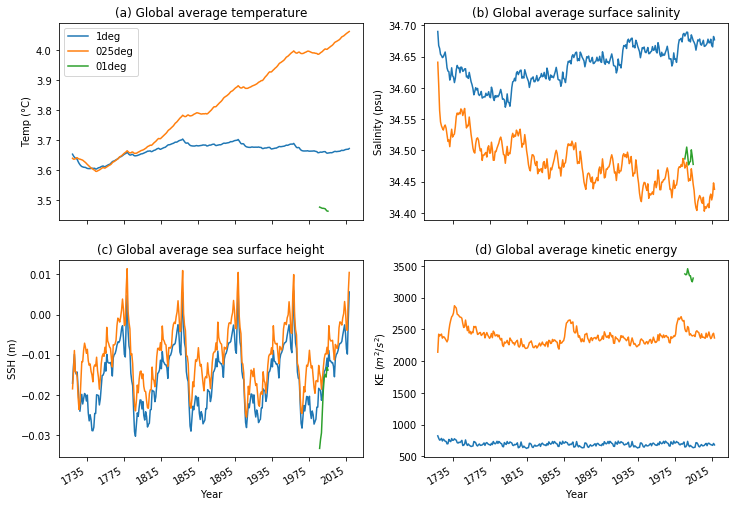

In [4]:
plt.figure(figsize=(12,8))
plt.subplot(221)
global_scalar('temp_global_ave')
plt.xlabel('')
plt.gca().axes.xaxis.set_ticklabels([])
plt.ylabel('Temp (°C)')
plt.title('(a) Global average temperature')
plt.legend()
plt.subplot(222)
global_scalar('salt_surface_ave')
plt.xlabel('')
plt.gca().axes.xaxis.set_ticklabels([])
plt.ylabel('Salinity (psu)')
plt.title('(b) Global average surface salinity')
plt.subplot(223)
global_scalar('eta_global')
plt.xlabel('Year')
plt.ylabel('SSH (m)')
plt.title('(c) Global average sea surface height')
plt.subplot(224)
global_scalar('ke_tot')
plt.xlabel('Year')
plt.ylabel('KE ($m^2/s^2$)')
plt.title('(d) Global average kinetic energy')
savefigure('GlobalTimeseries')

### Other posible scalar timeseries metrics include:

Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


Deleting cache file cache_get_nc_variable_1deg_jra55v13_iaf_spinup1_A_ocean_scalar.nc_temp_surface_ave_None_days-since-1718-01-01_-87658_False.pkl
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


Deleting cache file cache_get_nc_variable_025deg_jra55v13_iaf_ocean_scalar.nc_temp_surface_ave_None_days-since-1718-01-01_-87658_False.pkl
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


Deleting cache file cache_get_nc_variable_01deg_jra55v13_iaf_ocean_scalar.nc_temp_surface_ave_None_None_None_False.pkl


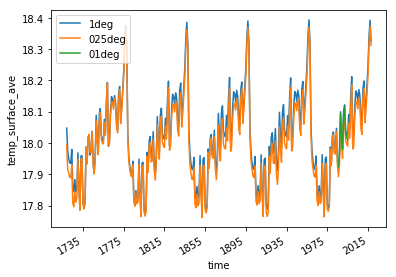

In [5]:
global_scalar('temp_surface_ave')
plt.legend()

Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


Deleting cache file cache_get_nc_variable_1deg_jra55v13_iaf_spinup1_A_ocean_scalar.nc_pe_tot_None_days-since-1718-01-01_-87658_False.pkl
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


Deleting cache file cache_get_nc_variable_025deg_jra55v13_iaf_ocean_scalar.nc_pe_tot_None_days-since-1718-01-01_-87658_False.pkl
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


Deleting cache file cache_get_nc_variable_01deg_jra55v13_iaf_ocean_scalar.nc_pe_tot_None_None_None_False.pkl


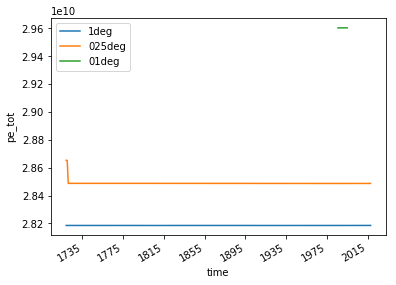

In [6]:
global_scalar('pe_tot')
plt.legend()